In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\4mjab\Desktop\Excel Novelnex\Fitbit Analysis\fitbit.csv")
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1503960366,12/4/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,NaN,1ST QUARTILE,3RD QUARTILE,Q3-Q1=IQR,1.5*(Q3-Q1),LL=Q1-1.5IQR,UL= Q3+1.5IQR
1,1503960366,13-04-2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,C,3789.75,10727,6937.25,10405.875,-6616.125,21132.875
2,1503960366,14-04-2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,181,1218,1776,D,2.619999886,7.712499976,5.09250009,7.638750135,-5.018750249,15.35125011
3,1503960366,15-04-2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,209,726,1745,E,2.619999886,7.710000038,5.090000152,7.635000228,-5.015000342,15.34500027
4,1503960366,16-04-2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,221,773,1863,F,0,0,0,0,0,0


In [12]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

# 1. Calories burnt by total steps

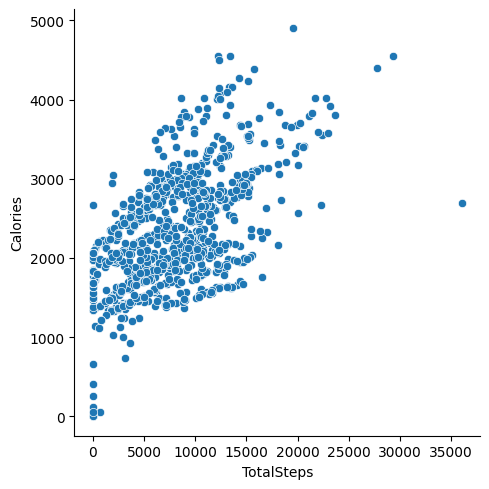

In [4]:
sns.relplot(data=df, x='TotalSteps',y='Calories',kind='scatter')

In [22]:
df = df[df['TotalSteps'] > 0]
df['Calories_per_Step'] = df['Calories'] / df['TotalSteps']
print("Average Calories per Step:", df['Calories_per_Step'].mean())

Average Calories per Step: 1.680172381679854


C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\622855626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calories_per_Step'] = df['Calories'] / df['TotalSteps']


In [24]:
print("Correlation:", df['TotalSteps'].corr(df['Calories']))

Correlation: 0.561981513116946


Text(0.5, 1.0, 'Calories Burned vs Total Steps')

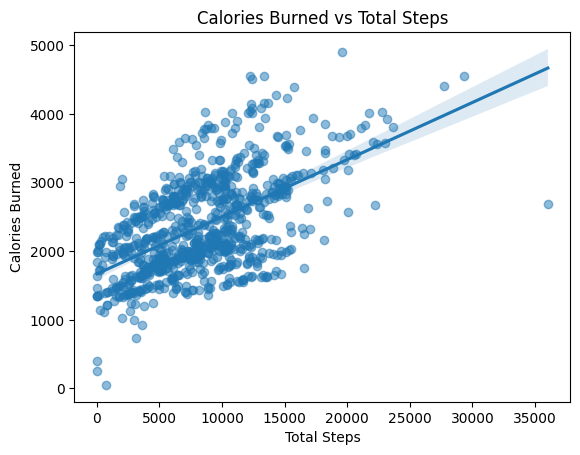

In [64]:
sns.regplot(x='TotalSteps', y='Calories', data=df, scatter_kws={'alpha':0.5})
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.title("Calories Burned vs Total Steps")

<Axes: >

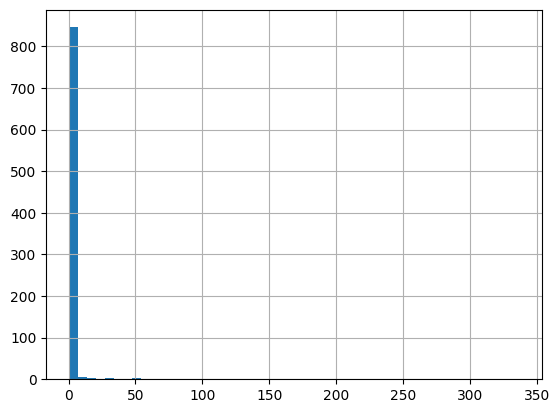

In [25]:
df['Calories_per_Step'].hist(bins=50)

Steps are a good but incomplete predictor of calories: correlation 0.56 shows other variables matter.

# 2. Sedentary Minutes and Calories

Text(0.5, 1.0, 'Sedentary Minutes vs Calories')

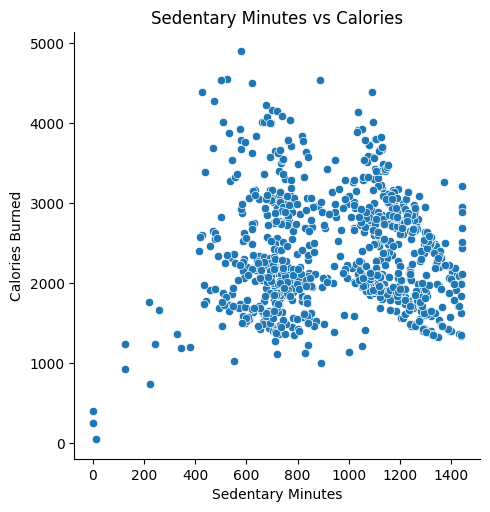

In [65]:
sns.relplot(data=df, x='SedentaryMinutes',y='Calories',kind='scatter')
plt.xlabel("Sedentary Minutes")
plt.ylabel("Calories Burned")
plt.title("Sedentary Minutes vs Calories")

<Axes: xlabel='SedentaryMinutes', ylabel='Calories'>

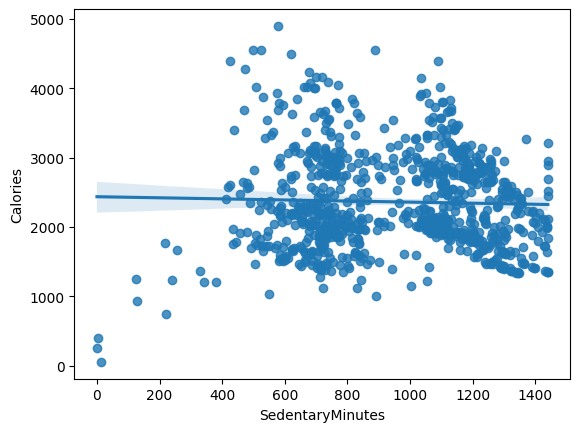

In [27]:
sns.regplot(data=df,x='SedentaryMinutes',y='Calories')

In [28]:
print("Correlation:", df['SedentaryMinutes'].corr(df['Calories']))

Correlation: -0.03106288674952234


More sedentary minutes → lower calories burned.

# 3. Sedentary Minutes Vs Total Active Minutes

In [29]:
df['TotalActiveMinutes'] = (
    df['VeryActiveMinutes'] +
    df['FairlyActiveMinutes'] +
    df['LightlyActiveMinutes']
)

C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\2067212884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalActiveMinutes'] = (


Text(0.5, 1.0, 'Sedentary vs Active Minutes')

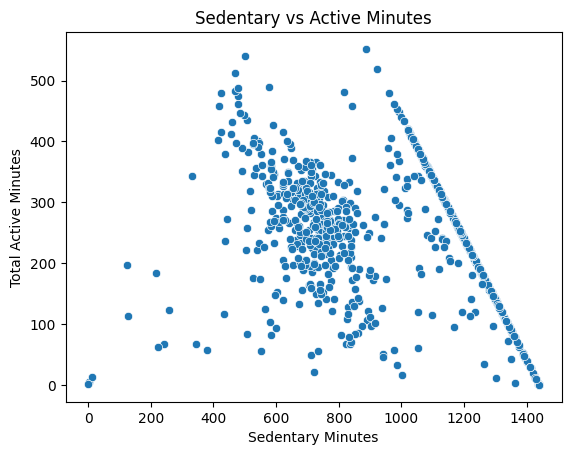

In [66]:
sns.scatterplot(x='SedentaryMinutes', y='TotalActiveMinutes', data=df)
plt.xlabel("Sedentary Minutes")
plt.ylabel("Total Active Minutes")
plt.title("Sedentary vs Active Minutes")

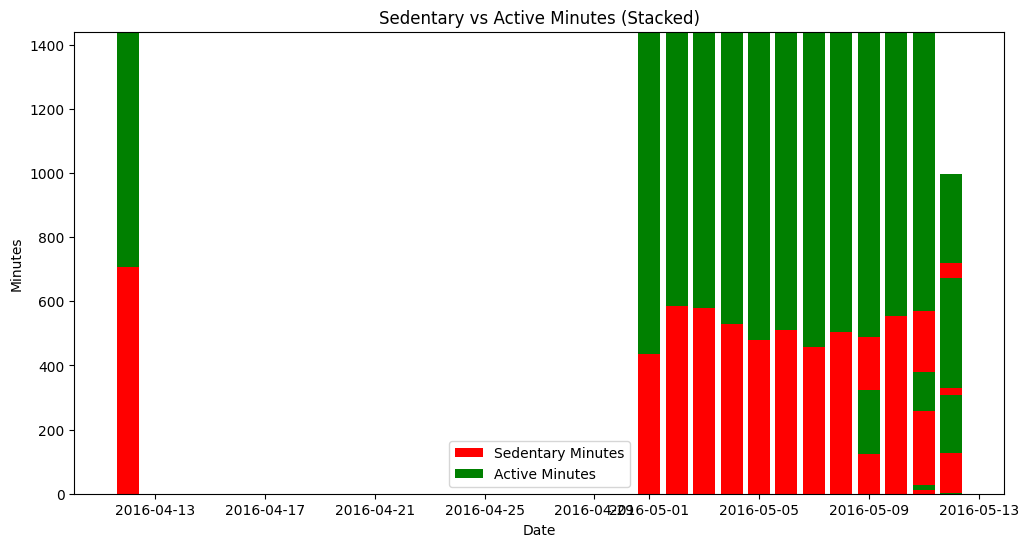

In [78]:
df['ActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

plt.figure(figsize=(12,6))
plt.bar(df['ActivityDate'], df['SedentaryMinutes'], label='Sedentary Minutes', color='red')
plt.bar(df['ActivityDate'], df['ActiveMinutes'], bottom=df['SedentaryMinutes'], label='Active Minutes', color='green')
plt.xlabel("Date")
plt.ylabel("Minutes")
plt.title("Sedentary vs Active Minutes (Stacked)")
plt.legend()
plt.show()

<Axes: xlabel='SedentaryMinutes', ylabel='TotalActiveMinutes'>

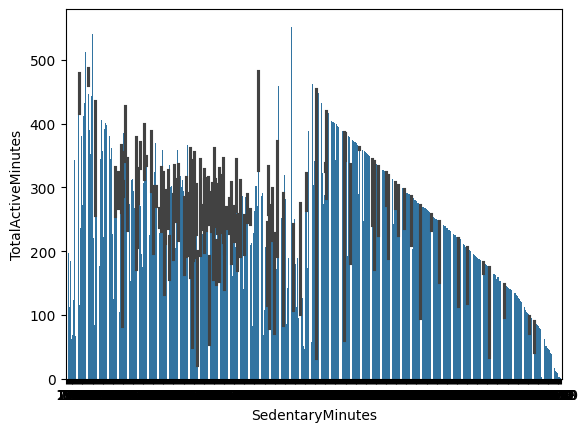

In [69]:
sns.barplot(x='SedentaryMinutes', y='TotalActiveMinutes',  data=df)

<Axes: xlabel='SedentaryMinutes'>

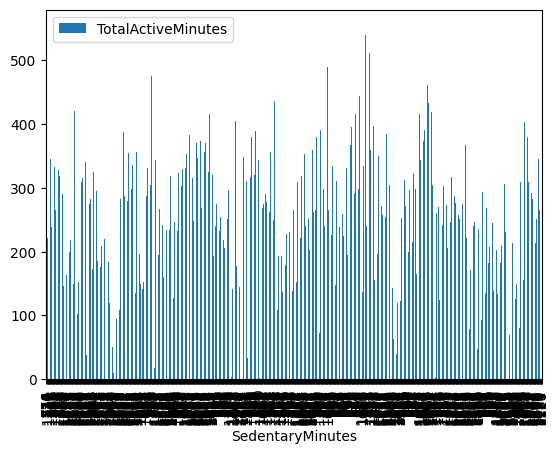

In [72]:
df.plot(x='SedentaryMinutes', y='TotalActiveMinutes', kind='bar',stacked =True)

In [32]:
print("Correlation:", df['SedentaryMinutes'].corr(df['TotalActiveMinutes']))

Correlation: -0.34529595209735026


A strong negative correlation → more sedentary time means fewer active minutes.

# 4. Calories Burnt by Day of the week

<Axes: xlabel='Calories', ylabel='ActivityDate'>

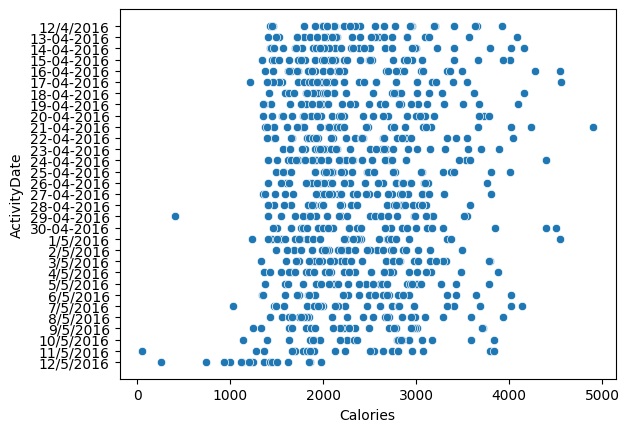

In [33]:
sns.scatterplot(x='Calories', y='ActivityDate', data=df)

In [35]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], dayfirst=True, errors='coerce')

C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\2849270207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], dayfirst=True, errors='coerce')


In [36]:
df['DayOfWeek'] = df['ActivityDate'].dt.day_name()

C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\430125074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['ActivityDate'].dt.day_name()


<Axes: xlabel='Calories', ylabel='DayOfWeek'>

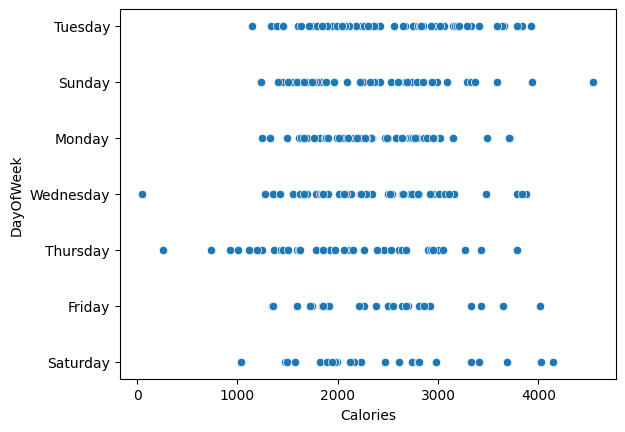

In [37]:
sns.scatterplot(x='Calories', y='DayOfWeek', data=df)

In [41]:
calories_by_day = df.groupby('DayOfWeek')['Calories'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print(calories_by_day)

DayOfWeek
Monday       2367.921569
Tuesday      2465.666667
Wednesday    2285.000000
Thursday     2007.488372
Friday       2399.607143
Saturday     2406.680000
Sunday       2317.490196
Name: Calories, dtype: float64


C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\4033614732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calories_by_day.index, y=calories_by_day.values, palette="viridis")


Text(0.5, 1.0, 'Average Calories Burned by Day of the Week')

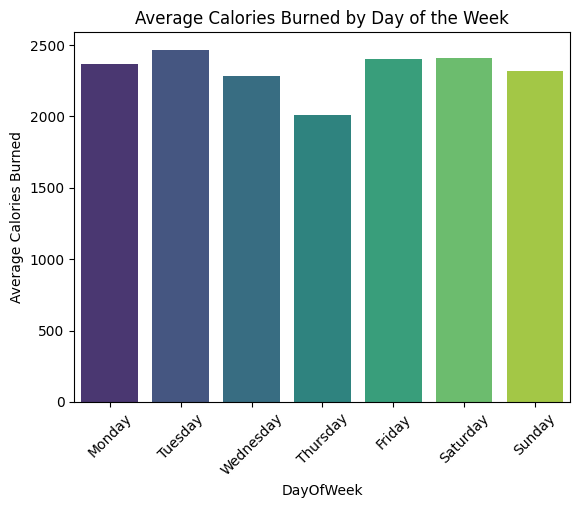

In [42]:
sns.barplot(x=calories_by_day.index, y=calories_by_day.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Calories Burned")
plt.title("Average Calories Burned by Day of the Week")

“Calories burned show a consistent pattern across all days of the week, with Tuesday being slightly higher and Thursday 
being the lowest. Unlike typical trends where weekends show spikes, this dataset suggests a stable daily routine without
large weekend variation.”

# 5. Total steps taken by Day of the week

<Axes: xlabel='TotalSteps', ylabel='DayOfWeek'>

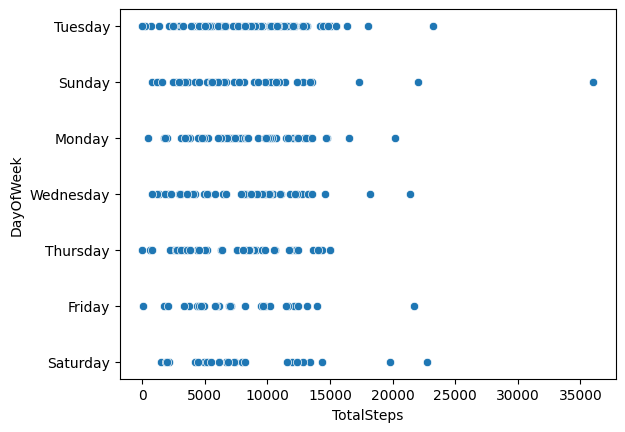

In [46]:
sns.scatterplot(x='TotalSteps', y='DayOfWeek', data=df)

In [49]:
TotalSteps_by_day = df.groupby('DayOfWeek')['TotalSteps'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print(TotalSteps_by_day)

DayOfWeek
Monday       8375.529412
Tuesday      8972.296296
Wednesday    7686.061224
Thursday     7589.046512
Friday       7760.250000
Saturday     8295.440000
Sunday       7788.313725
Name: TotalSteps, dtype: float64


C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\795353351.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TotalSteps_by_day.index, y=TotalSteps_by_day.values, palette="viridis")


Text(0.5, 1.0, 'Average Steps by Day of the Week')

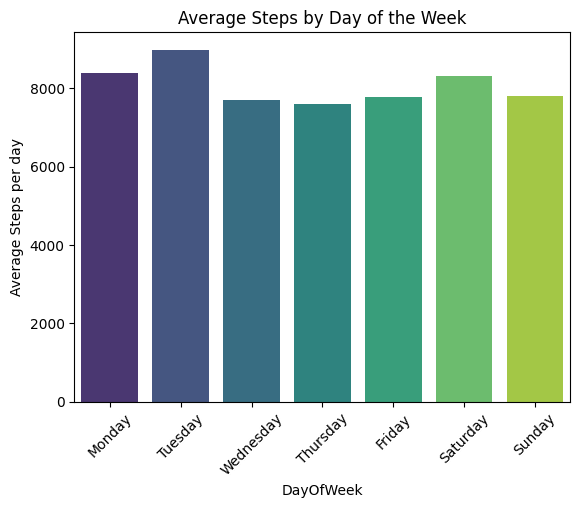

In [50]:
sns.barplot(x=TotalSteps_by_day.index, y=TotalSteps_by_day.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Steps per day")
plt.title("Average Steps by Day of the Week")

C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\941664970.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TotalSteps_by_day.index, y=TotalSteps_by_day.values, palette="Set2")


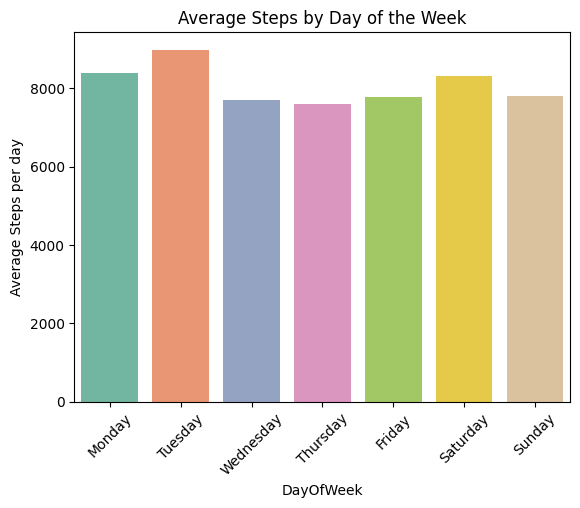

In [79]:
sns.barplot(x=TotalSteps_by_day.index, y=TotalSteps_by_day.values, palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Average Steps per day")
plt.title("Average Steps by Day of the Week")
plt.show()

"Step counts remain fairly stable across the week, averaging 7.5k–9k daily. Tuesday tends to be the most active day (~9k). Unlike many fitness patterns, weekends do not show a significant increase, indicating a steady lifestyle routine with limited variation across the week.”

# 6. Total Time Asleep By Day of the week

<Axes: xlabel='SedentaryMinutes', ylabel='DayOfWeek'>

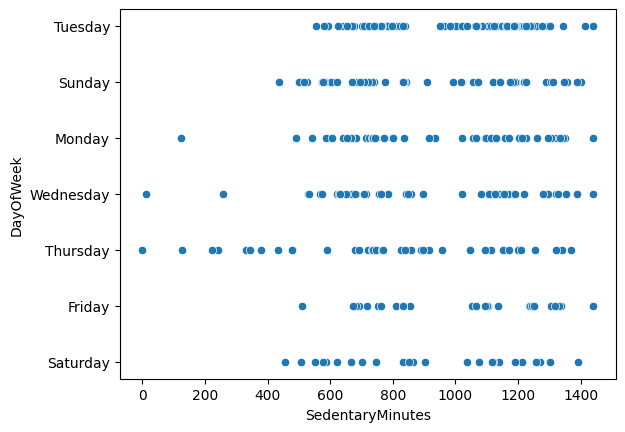

In [51]:
sns.scatterplot(x='SedentaryMinutes', y='DayOfWeek', data=df)

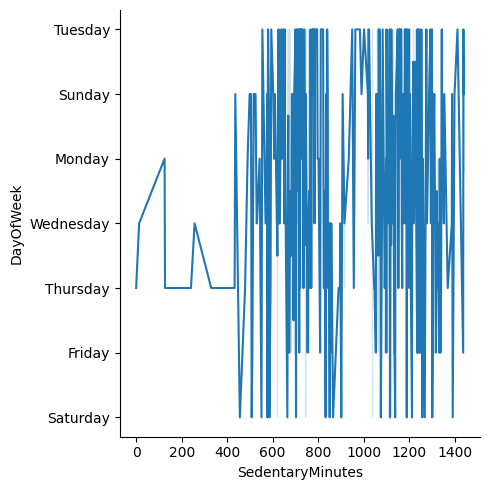

In [74]:
sns.relplot(data=df, x='SedentaryMinutes',y='DayOfWeek',kind='line')

<Axes: xlabel='SedentaryMinutes', ylabel='count'>

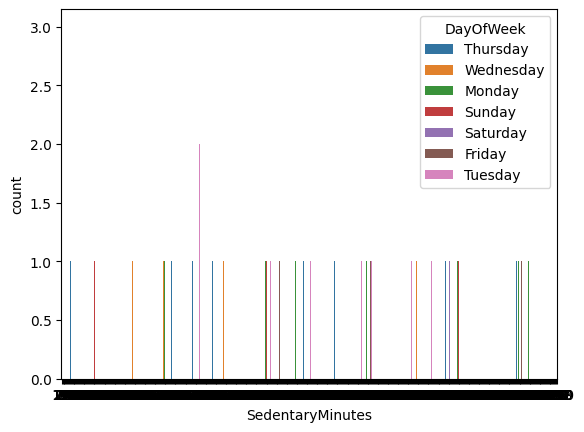

In [53]:
sns.countplot(data= df,x='SedentaryMinutes',hue='DayOfWeek')

In [54]:
sleeptime_by_day = df.groupby('DayOfWeek')['SedentaryMinutes'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print(sleeptime_by_day)

DayOfWeek
Monday        959.921569
Tuesday       981.382716
Wednesday     931.326531
Thursday      808.604651
Friday       1006.535714
Saturday      929.280000
Sunday        898.686275
Name: SedentaryMinutes, dtype: float64


C:\Users\4mjab\AppData\Local\Temp\ipykernel_6116\2476640251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleeptime_by_day.index, y=sleeptime_by_day.values, palette="coolwarm")


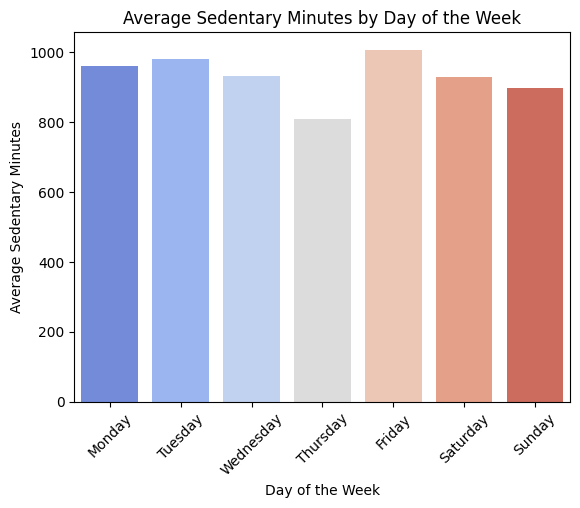

In [80]:

sns.barplot(x=sleeptime_by_day.index, y=sleeptime_by_day.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Average Sedentary Minutes")
plt.xlabel("Day of the Week")
plt.title("Average Sedentary Minutes by Day of the Week")
plt.show()

“On average, participants spent 13–16 hours per day in sedentary activities. Thursday was the most active day. Interestingly, weekends did not show higher sedentary time compared to weekdays, suggesting a consistent daily routine.”

# 7. The Most and Least Active Hours of the Day

In [59]:
df['VeryActiveHours'] = df['VeryActiveMinutes'] / 60
df['FairlyActiveHours'] = df['FairlyActiveMinutes'] / 60
df['LightlyActiveHours'] = df['LightlyActiveMinutes'] / 60
df['SedentaryHours'] = df['SedentaryMinutes'] / 60

In [61]:
activity_hours = df.melt(
    id_vars=['ActivityDate'], 
    value_vars=['VeryActiveHours', 'FairlyActiveHours', 'LightlyActiveHours', 'SedentaryHours'], 
    var_name='ActivityType', 
    value_name='Hours'
)

Text(0.5, 1.0, 'Daily Activity Hours by Type')

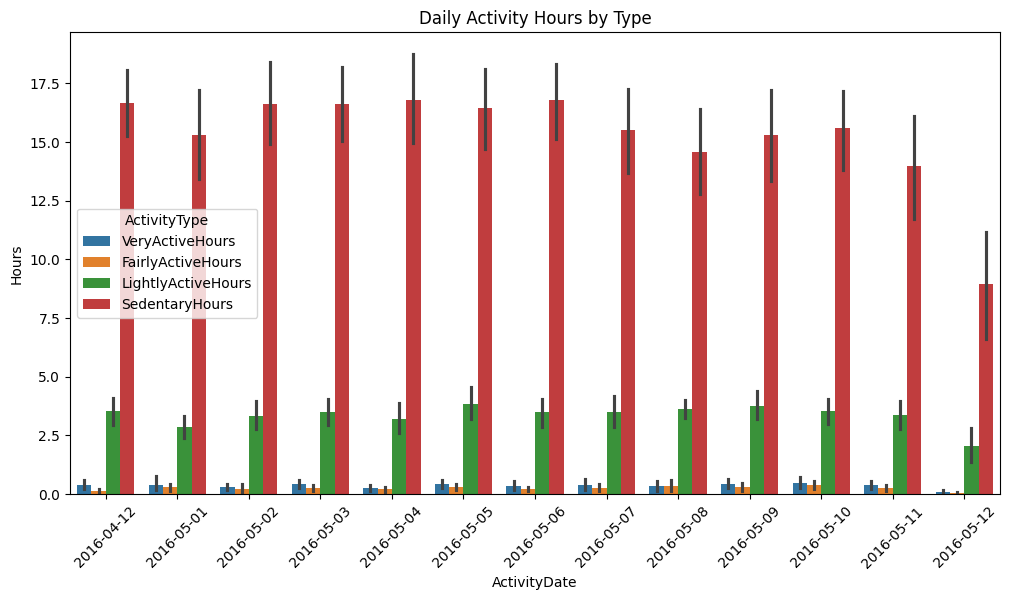

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=activity_hours, x='ActivityDate', y='Hours', hue='ActivityType')
plt.xticks(rotation=45)
plt.ylabel('Hours')
plt.title('Daily Activity Hours by Type')

“Visual comparison shows that on most days, sedentary hours exceed active hours, highlighting 
the importance of more movement.”